In [1]:
import paho.mqtt.client
c = paho.mqtt.client.Client()


In [12]:
c.connect("192.168.43.1")

0

In [14]:
for i in range(100):
    c.publish("qqq", "ppp%d"%i)

In [3]:
help(paho.mqtt.client.Client)

Help on class Client in module paho.mqtt.client:

class Client(builtins.object)
 |  MQTT version 3.1/3.1.1 client class.
 |  
 |  This is the main class for use communicating with an MQTT broker.
 |  
 |  General usage flow:
 |  
 |  * Use connect()/connect_async() to connect to a broker
 |  * Call loop() frequently to maintain network traffic flow with the broker
 |  * Or use loop_start() to set a thread running to call loop() for you.
 |  * Or use loop_forever() to handle calling loop() for you in a blocking
 |  * function.
 |  * Use subscribe() to subscribe to a topic and receive messages
 |  * Use publish() to send messages
 |  * Use disconnect() to disconnect from the broker
 |  
 |  Data returned from the broker is made available with the use of callback
 |  functions as described below.
 |  
 |  Callbacks
 |  =========
 |  
 |  A number of callback functions are available to receive data back from the
 |  broker. To use a callback, define a function and then assign it to the
 | 

In [71]:
import paho.mqtt.client
c = paho.mqtt.client.Client()

polemessages = [ ]
def on_message(mosq, obj, msg):
    polemessages.append(msg.payload)
c.on_message = on_message

#c.connect("mqtt.local")
#c.subscribe("walkingpole/dtilt")

In [17]:
#c.unsubscribe("walkingpole/dtilt")   #192.168.0.56

(4, None)

In [101]:
import time
c.connect("mqtt.local")
c.subscribe("walkingpole/dtilt")
polemessages = [ ]
pmlenprev = 0
t0 = time.time()
while True:
    c.loop()
    if len(polemessages) > pmlenprev + 40:
        pmlenprev = len(polemessages)
        print(pmlenprev)
    if pmlenprev > 20*10:
        break
print(time.time() - t0, "seconds")
c.unsubscribe("walkingpole/dtilt")


41
82
123
164
205
10.570346593856812 seconds


(0, 6)

In [102]:
#polemessages

In [103]:
import pandas, io
df = pandas.read_csv(io.BytesIO(b"\n".join(polemessages)), sep=" ", index_col=False, 
                     names=["dt", "las", "tiltx", "tilty", "accz"])
df = df.iloc[75:]


In [104]:
from matplotlib import pyplot as plt
%matplotlib inline

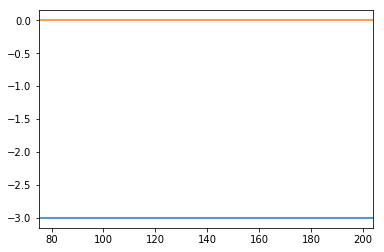

In [105]:
df.tiltx.plot()
df.tilty.plot()


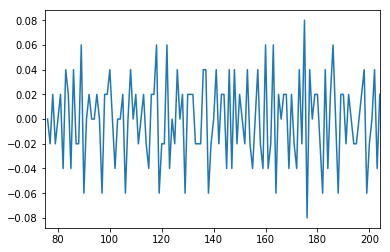

In [110]:
(df.las.diff()*20/1000).plot()


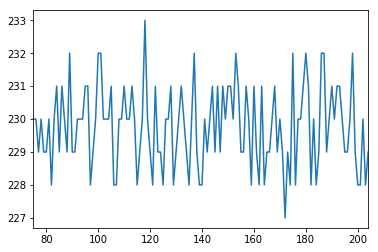

In [106]:
df.las.plot()


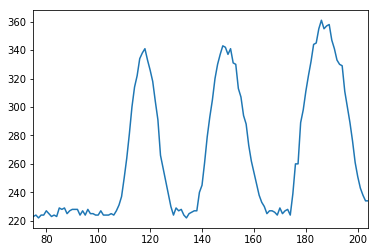

In [83]:
for i in range(len(df)):
    break
    if df.iloc[i].las == 0:
        print(i)
        if df.iloc[i-1].las != 0 and df.iloc[i+1].las != 0:
            df.iloc[i] = (df.iloc[i-1].las + df.iloc[i+1].las)/2
            
df.las.plot()


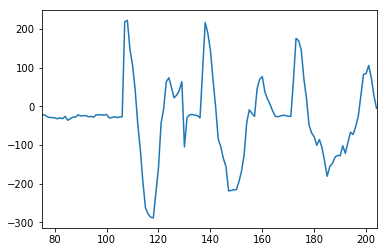

In [84]:
df.accz.plot()

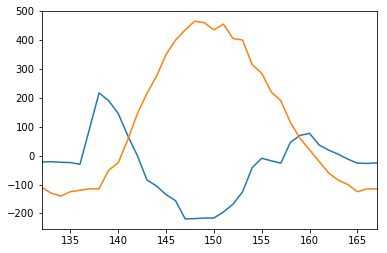

In [88]:
t0, t1 = 132, 167 
#t0, t1 = 75, 200
df.loc[t0:t1].accz.plot()
((df.loc[t0:t1].las-250)*5).plot()


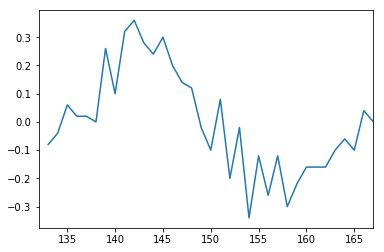

In [91]:
vlas = (df.loc[t0:t1].las.diff()*20/1000)
vlas.plot()



In [98]:
vacc = (df.loc[t0:t1].accz/100/20).cumsum()
n = len(vacc) - 1
ev = vacc.iloc[n]
for i in range(n+1):
    vacc.iloc[i] += -ev*(i/n)


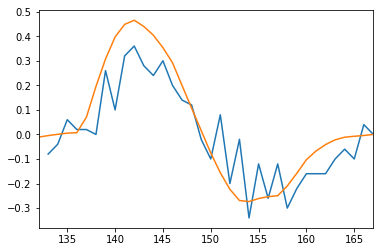

In [100]:
vlas.plot()
vacc.plot()
